## Exploratory Data Analysis of Mubawab listings

In [101]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
from scipy import stats

In [102]:
#allow complete display of dataframes 
pd.set_option('display.min_rows', 20)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [103]:
#read data
df = pd.read_csv('mubawab_listings_clean.csv')
df.head()

,Type,Localisation,Latitude,Longitude,Price,Area,Rooms,Bedrooms,Bathrooms,Floor,Other_tags,Price_m2
0,Appartements,Casablanca Finance City,NaN,NaN,22000,219.0,4.0,3.0,3.0,11.0,"['Nouveau', ""Moins d'un an""]",100.456621
1,Appartements,Anfa,NaN,NaN,1230000,86.0,3.0,2.0,2.0,1.0,"['Bon état', '10-20 ans']",14302.325581
2,Appartements,La Gironde,NaN,NaN,900000,86.0,3.0,2.0,1.0,5.0,"['Bon état', '10-20 ans']",10465.116279
3,Appartements,Bourgogne Ouest,NaN,NaN,2400000,180.0,5.0,3.0,3.0,3.0,"['Bon état', '10-20 ans']",13333.333333
4,Appartements,Les princesses,33.574209,-7.644182,1550000,120.0,5.0,3.0,2.0,5.0,"['Bon état', '5-10 ans']",12916.666667


In [104]:
#inspect features types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          1599 non-null   object 
 1   Localisation  1599 non-null   object 
 2   Latitude      888 non-null    float64
 3   Longitude     888 non-null    float64
 4   Price         1599 non-null   int64  
 5   Area          1599 non-null   float64
 6   Rooms         1528 non-null   float64
 7   Bedrooms      1595 non-null   float64
 8   Bathrooms     1553 non-null   float64
 9   Floor         1248 non-null   float64
 10  Other_tags    1599 non-null   object 
 11  Price_m2      1599 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 150.0+ KB


### Clean and explore the variables

#### Other_tags variable

Let us first explore the data stored in the 'Other_tags' column. 

This is stored as lists which means there will be some transformations to be made to be able to explore the data.
Actually the data is currently stored a strings and not lists so the first transformation is to change the type from strings to lists. The eval function will come in handy in this case.

In [105]:
#Transform other tags type from string to list
df['Other_tags'] = df.Other_tags.apply(eval)

Now that we have changed the type to lists we face our first challenge. 

The usual pandas methods such as unique() and value_counts() will not work properly for data stored in this format. Hence, we will have to unwrap the entries of every individual list in every row into a single series with one entry per row. This will allow us to use the pandas methods on that series.

In [106]:
#Inpsect Other tags column's content

def to_1D(series):
    '''
    Transform list elements of a seriers into a single series of all entries
    '''
    return pd.Series([x for _list in series for x in _list])

#Check unique elements found in the Other tags lists
other_tags_unique = to_1D(df.Other_tags).unique()
display(other_tags_unique)

#Check their frequency
other_tags_frq = to_1D(df.Other_tags).value_counts()
display(other_tags_frq)

array(['Nouveau', "Moins d'un an", 'Bon état', '10-20 ans', '5-10 ans',
       '20-30 ans', '1-5 ans', 'À rénover', '30-50 ans', '50-70 ans'],
      dtype=object)

Bon état         890
Nouveau          434
10-20 ans        330
5-10 ans         280
1-5 ans          155
Moins d'un an    107
À rénover        101
20-30 ans         82
30-50 ans         14
50-70 ans          2
dtype: int64

We can split this data into two different variables, one related to the current state of the property and one related to its age.

In [107]:
#Split frequency table according to the two variables
current_state_tags = ['Bon état','Nouveau','À rénover']
current_state_tag_freq = other_tags_frq[current_state_tags]

age_tags = ["Moins d'un an",'1-5 ans','5-10 ans','10-20 ans','20-30 ans','30-50 ans','50-70 ans']
age_tag_freq = other_tags_frq[age_tags]

In [108]:
#expand other tags column into two variables

def to_var(list_of_tags, var_tags):
    for tag in var_tags:
        if tag in list_of_tags:
            return tag
    else:
        return np.nan

df_exp = df.copy()
df_exp['Current_state'] = df.Other_tags.apply(lambda x: to_var(x,current_state_tags))
df_exp['Age'] = df.Other_tags.apply(lambda x: to_var(x,age_tags))

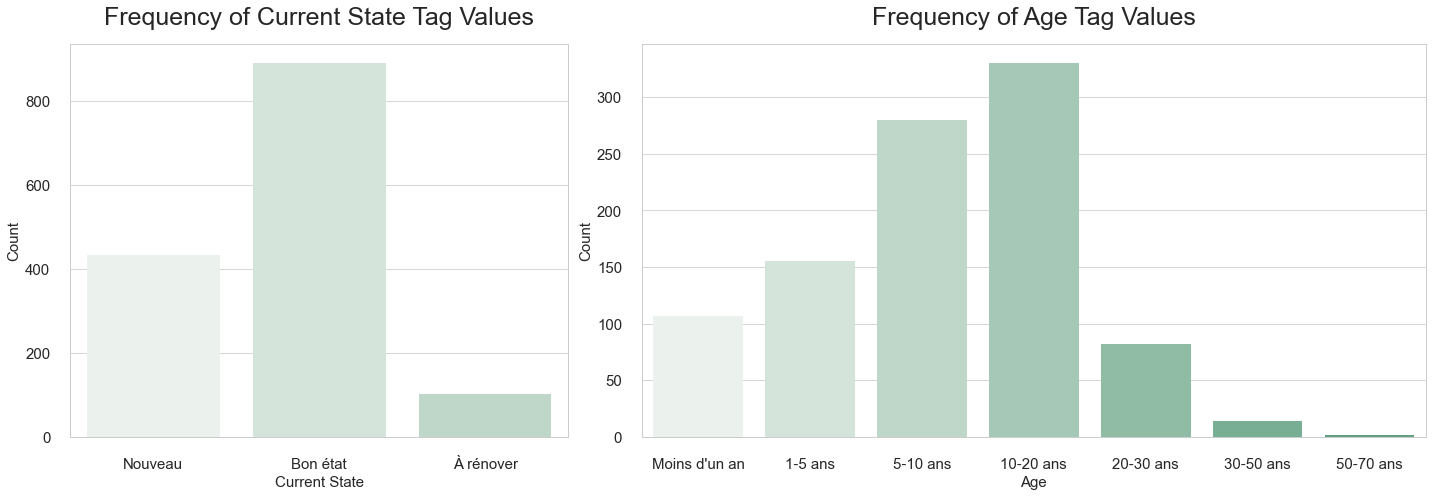

In [109]:
plt.style.use('seaborn-whitegrid')
cust_pal = sns.color_palette(sns.light_palette('#0d874b',10))
fig, axes = plt.subplots(1,5,figsize = (20,7))

ax1 = plt.subplot2grid((1,5),(0,0),colspan = 2)
ax2 = plt.subplot2grid((1,5),(0,2),colspan = 3)

g= sns.countplot(data=df_exp,
                 x= 'Current_state',
                 palette = cust_pal,
                 ax = ax1)
ax1.tick_params(axis='both', which='major', labelsize=15,pad=20)
ax1.set_title('Frequency of Current State Tag Values',fontsize = 25,pad = 20)
ax1.set_xlabel('Current State',fontsize = 15)
ax1.set_ylabel('Count',fontsize = 15)

g= sns.countplot(data=df_exp,
                 x= 'Age',
                 palette = cust_pal,
                 ax = ax2,
                 order = ["Moins d'un an",'1-5 ans','5-10 ans','10-20 ans','20-30 ans','30-50 ans','50-70 ans'])
ax2.tick_params(axis='both', which='major', labelsize=15,pad=20)
ax2.set_title('Frequency of Age Tag Values',fontsize = 25,pad = 20)
ax2.set_xlabel('Age',fontsize = 15)
ax2.set_ylabel('Count',fontsize = 15)


plt.tight_layout()
plt.show()

#### Type variable 

Let us now explore the distribution of listing types

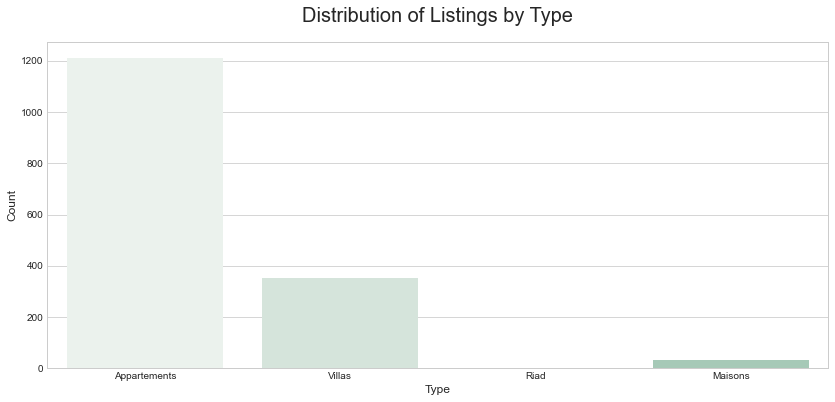

In [110]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize = (14,6))
ax = sns.countplot(x= 'Type' , data = df_exp,palette = cust_pal)
ax.set_title('Distribution of Listings by Type',fontsize = 20, pad = 20)
ax.set_xlabel('Type',fontsize = 12)
ax.set_ylabel('Count',fontsize = 12)
#plt.xticks(rotation = 90)
plt.show()

In [111]:
#Explore the distribution of types
df_exp['Type'].value_counts()

Appartements    1212
Villas           352
Maisons           32
Riad               3
Name: Type, dtype: int64

The large majority of listings are for Appartements with more than 1200 listings which represents more than 75% of listings. There aree very few Maisons and Riads and we should consider merging them with Villas.

In [112]:
#merging 'Riad' and 'Maisons' into 'Villas'
df_exp['Type'] = df_exp['Type'].replace('Riad','Villas').replace('Maisons','Villas')

#### Neighbourhood variable

Explore and visualize the distribution of listings by neighbourhood

In [113]:
#Number of listings by neighbourhood
neighbourhood_counts =df_exp['Localisation'].value_counts()
display(neighbourhood_counts)

Californie          173
Racine               92
Ain Diab             72
Maârif Extension     68
Gauthier             61
Bourgogne Ouest      60
Les princesses       59
Oasis                54
Anfa                 51
CIL (Hay Salam)      48
                   ... 
Hay M'barka           1
Hay Al Qods           1
Hay Inara             1
Hay Mansour           1
Foncière              1
Garage Allal          1
Hay Hakam             1
Sidi Othmane          1
Michouar              1
Sidi Belyout          1
Name: Localisation, Length: 105, dtype: int64

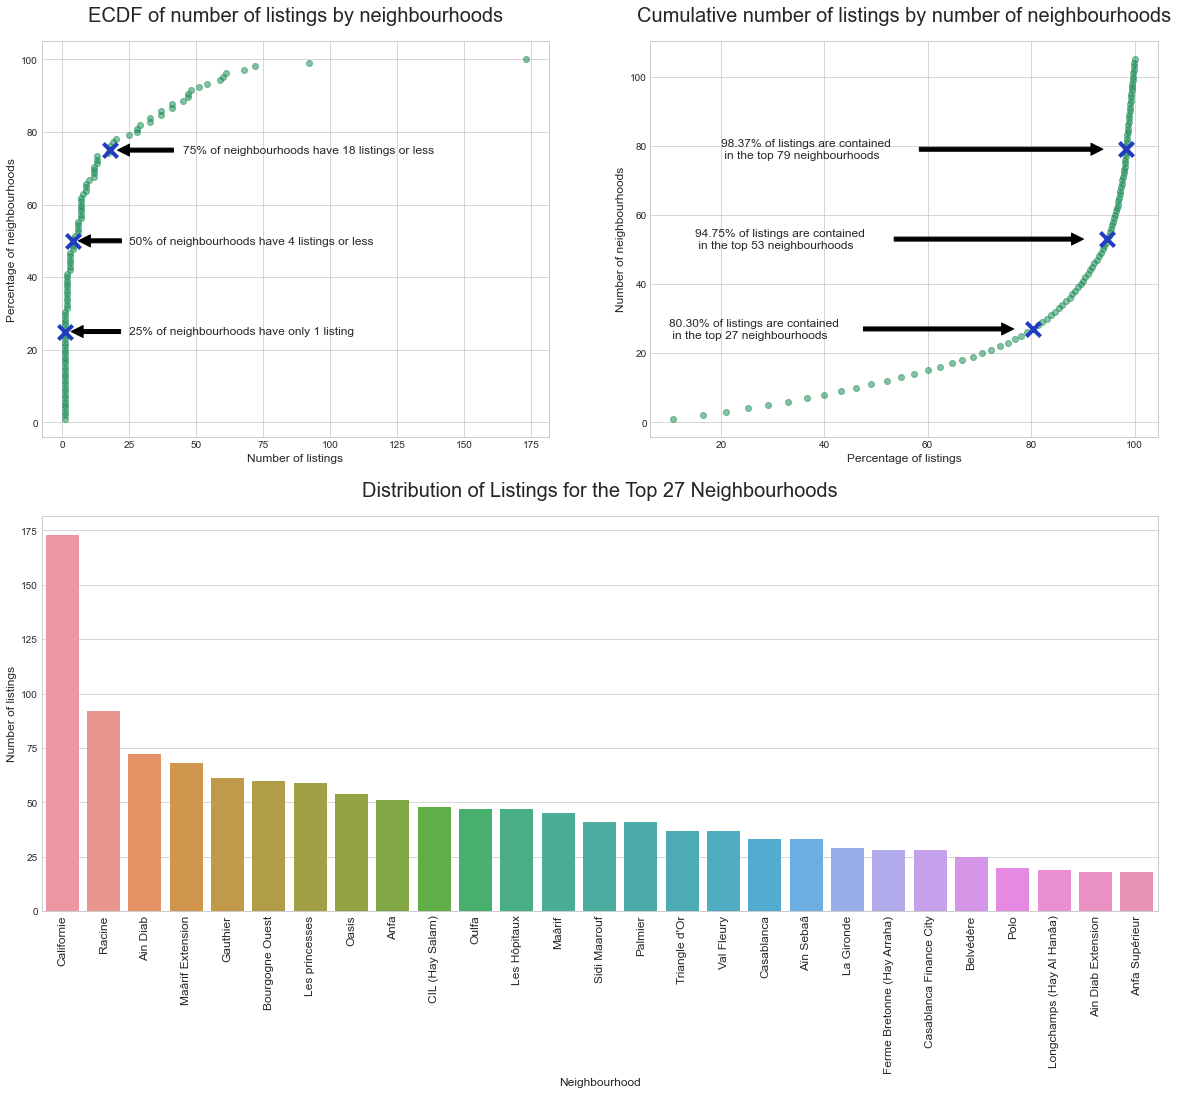

In [114]:
#Plot ECDF of the number of listings by neihbourhoods, cumulative number of listings in neighbourhood,
#and distribution of listings by neighbourhood

fig, axes = plt.subplots(2,2,figsize = (20,16))

ax1 = plt.subplot2grid((2,2),(0,0))
ax2 = plt.subplot2grid((2,2),(0,1))
ax3 = plt.subplot2grid((2,2),(1,0),colspan = 2)

#arange data
xs = neighbourhood_counts.sort_values()
ys = np.arange(1,len(xs)+1)/len(xs)*100

#compute percentiles of listings data
ptiles = [25,50,75]
ptiles_data = np.percentile(xs,ptiles)

#plot ecdf and 1st 2nd and 3rd quantiles
ax1.scatter(xs,ys,marker = 'o',alpha = 0.5,color = '#0d874b')
ax1.scatter(ptiles_data,ptiles,marker = 'x',color = '#213cc0',s = 200,linewidths=4)

#annotate the plot
ax1.annotate(f'{ptiles[0]}% of neighbourhoods have only {int(ptiles_data[0])} listing', 
             xy = (ptiles_data[0],ptiles[0]), 
             xytext = (25,ptiles[0]), 
             arrowprops=dict(facecolor='black', 
                             shrink=0.1), 
             verticalalignment='center', 
             fontsize = 12)
ax1.annotate(f'{ptiles[1]}% of neighbourhoods have {int(ptiles_data[1])} listings or less', 
             xy = (ptiles_data[1],ptiles[1]), 
             xytext = (25,ptiles[1]), 
             arrowprops=dict(facecolor='black', 
                             shrink=0.1), 
             verticalalignment='center',
             fontsize = 12)
ax1.annotate(f'{ptiles[2]}% of neighbourhoods have {int(ptiles_data[2])} listings or less', 
             xy = (ptiles_data[2],ptiles[2]), 
             xytext = (45,ptiles[2]), 
             arrowprops=dict(facecolor='black', 
                             shrink=0.1), 
             verticalalignment='center',
             fontsize = 12)

ax1.set_ylabel('Percentage of neighbourhoods',fontsize = 12)
ax1.set_xlabel('Number of listings',fontsize = 12)
ax1.set_title('ECDF of number of listings by neighbourhoods',fontsize = 20,pad = 20)


#Plot cumulative number of listings by neighbourhoods
values = neighbourhood_counts.sort_values(ascending = False)
xs = np.zeros(len(values))
xs[0] = values[0]
for i in range(1,len(values)):
    xs[i] = xs[i-1] + values[i]
xs = xs/values.sum()*100
ys = np.arange(1,len(xs)+1)#/len(xs)*100

ptiles = [25,50,75]
ptiles_ydata = [int(x) for x in np.percentile(np.arange(1,len(xs)+1),[25,50,75])]
ptiles_data = np.percentile(xs,ptiles)

ax2.scatter(xs,ys,marker = 'o',alpha = 0.5,color = '#0d874b')
ax2.scatter(ptiles_data,ptiles_ydata,marker = 'x',color = '#213cc0',s = 200,linewidths=4)

#annotate the plot
ax2.annotate(f'{ptiles_data[0]:.2f}% of listings are contained \n in the top {ptiles_ydata[0]} neighbourhoods', 
             xy = (ptiles_data[0],ptiles_ydata[0]), 
             xytext = (10,ptiles_ydata[0]), 
             arrowprops=dict(facecolor='black', 
                             shrink=0.1), 
             verticalalignment='center', 
             fontsize = 12)
ax2.annotate(f'{ptiles_data[1]:.2f}% of listings are contained \n in the top {ptiles_ydata[1]} neighbourhoods', 
             xy = (ptiles_data[1],ptiles_ydata[1]), 
             xytext = (15,ptiles_ydata[1]), 
             arrowprops=dict(facecolor='black', 
                             shrink=0.1), 
             verticalalignment='center',
             fontsize = 12)
ax2.annotate(f'{ptiles_data[2]:.2f}% of listings are contained \n in the top {ptiles_ydata[2]} neighbourhoods', 
             xy = (ptiles_data[2],ptiles_ydata[2]), 
             xytext = (20,ptiles_ydata[2]), 
             arrowprops=dict(facecolor='black', 
                             shrink=0.1), 
             verticalalignment='center',
             fontsize = 12)

ax2.set_ylabel('Number of neighbourhoods',fontsize = 12)
ax2.set_xlabel('Percentage of listings',fontsize = 12)
ax2.set_title('Cumulative number of listings by number of neighbourhoods',fontsize = 20,pad = 20)


#Plot the distribution of listings by neighbourhood

data = df_exp[df_exp['Localisation'].isin(neighbourhood_counts[:27].index)]
ax3 = sns.countplot(x= 'Localisation' , data = data, order = data.value_counts('Localisation').index)
ax3.set_ylabel('Number of listings',fontsize = 12)
ax3.set_xlabel('Neighbourhood',fontsize = 12)
ax3.set_title('Distribution of Listings for the Top 27 Neighbourhoods',fontsize = 20,pad = 20)
plt.xticks(rotation = 90,fontsize = 12)


plt.show()

The three most represented neighbourhoods in the data are Californie, Racine, and Ain Diab with 173, 92 and 72 listings respectively.

From the data, we notice that there is a very large imbalance in the distribution of listings by neighbourhood.
50% of neighbourhoods are represented by 4 listings or less while 80% of listings are associated with the 24 top neighbourhood by number of listings, this represents 25% of the total number of neighbourhoods.

We could find different explanations for this imbalance : 
- It could the different sizes of the neighbourhoods with some being much smaller than others.
- This could also be explained by the lack of usage of digital real estate platforms such as mubawab with populations in certain neighbourhoods such as those populated with a lower socio-economic class.

We should find a way to merge these neighbourhoods into larger entities to balance this distribution imbalance between neighbourhoods or leave them out of the analysis altogether.

For now, we will continue our exploratory analysis on listings from the top 27 neighbourhoods keeping 80% of the listings

In [115]:
#Keep only the data from the top 27 neighbourhoods by number of listings
neighbourhoods_kept = neighbourhood_counts[:27].index
df_20_plus = df_exp[df_exp['Localisation'].isin(neighbourhoods_kept)]

#### Price variable

In [116]:
#Describe the price variable
df_20_plus['Price'].describe()

count    1.284000e+03
mean     5.009410e+06
std      7.369022e+06
min      2.000000e+03
25%      1.467500e+06
50%      2.395000e+06
75%      5.300000e+06
max      7.140000e+07
Name: Price, dtype: float64

Right away we can see that we have some outliers with a price per m2 ranging from around 2000 MAD to 71,400,000 MAD/m2.

Let's investigate further

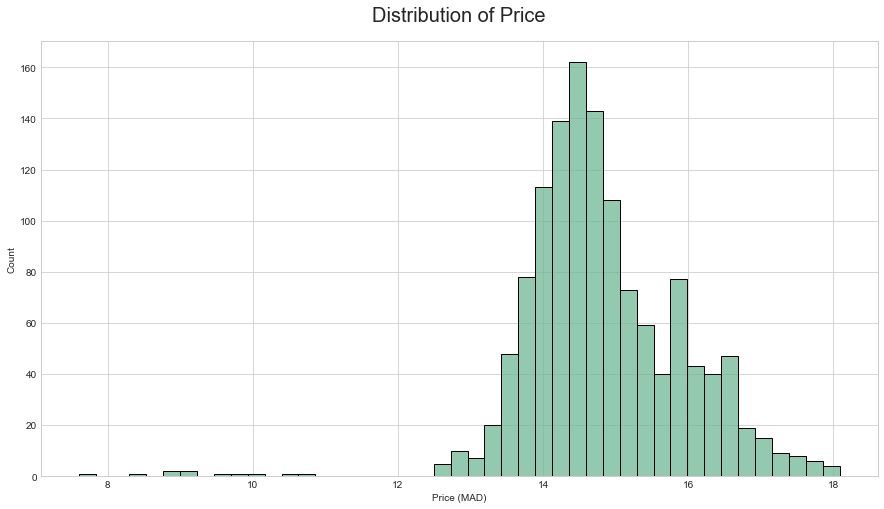

In [117]:
#Plot the distribution of price per m2
fig, ax = plt.subplots(figsize = (15,8))

g = sns.histplot(data = df_20_plus, x = np.log(df_20_plus['Price']),color = cust_pal[5], ax = ax)
g.set_title('Distribution of Price',fontsize = 20, pad = 20)
g.set_xlabel('Price (MAD)')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))
plt.show()

In [118]:
#display the potential outlier listings in dataframe
display(df_20_plus.sort_values(['Price']).head(20))
display(df_20_plus.sort_values(['Price']).tail(20))

,Type,Localisation,Latitude,Longitude,Price,Area,Rooms,Bedrooms,Bathrooms,Floor,Other_tags,Price_m2,Current_state,Age
608,Appartements,Casablanca Finance City,33.564573,-7.656772,2000,104.0,3.0,2.0,2.0,NaN,"[Bon état, Moins d'un an]",19.230769,Bon état,Moins d'un an
341,Appartements,Sidi Maarouf,NaN,NaN,5000,95.0,2.0,2.0,2.0,NaN,[Bon état],52.631579,Bon état,NaN
1410,Appartements,Val Fleury,33.575373,-7.637855,7000,124.0,4.0,3.0,2.0,3.0,"[Bon état, 10-20 ans]",56.451613,Bon état,10-20 ans
950,Appartements,Les princesses,33.571543,-7.636313,8000,95.0,3.0,2.0,2.0,4.0,"[Nouveau, 5-10 ans]",84.210526,Nouveau,5-10 ans
359,Appartements,Gauthier,NaN,NaN,9500,140.0,4.0,3.0,2.0,4.0,"[Nouveau, 1-5 ans]",67.857143,Nouveau,1-5 ans
762,Appartements,Racine,33.592458,-7.648158,10000,200.0,4.0,3.0,3.0,NaN,[Bon état],50.000000,Bon état,NaN
1590,Appartements,Palmier,33.580947,-7.629061,14200,284.0,7.0,5.0,3.0,2.0,"[Bon état, 10-20 ans]",50.000000,Bon état,10-20 ans
1325,Appartements,Palmier,NaN,NaN,17000,143.0,4.0,3.0,3.0,2.0,"[Nouveau, 5-10 ans]",118.881119,Nouveau,5-10 ans
0,Appartements,Casablanca Finance City,NaN,NaN,22000,219.0,4.0,3.0,3.0,11.0,"[Nouveau, Moins d'un an]",100.456621,Nouveau,Moins d'un an
367,Villas,Ain Diab,33.586309,-7.671375,38000,445.0,8.0,4.0,4.0,0.0,[Bon état],85.393258,Bon état,NaN


,Type,Localisation,Latitude,Longitude,Price,Area,Rooms,Bedrooms,Bathrooms,Floor,Other_tags,Price_m2,Current_state,Age
146,Villas,Californie,33.537669,-7.627871,35000000,2500.0,4.0,4.0,4.0,0.0,"[Bon état, 5-10 ans]",14000.000000,Bon état,5-10 ans
534,Villas,Anfa Supérieur,33.588597,-7.660475,35000000,1620.0,8.0,4.0,4.0,0.0,[Bon état],21604.938272,Bon état,NaN
1424,Villas,Anfa,NaN,NaN,36000000,1600.0,10.0,5.0,5.0,0.0,"[Bon état, 10-20 ans]",22500.000000,Bon état,10-20 ans
1533,Villas,Californie,33.535958,-7.625628,39000000,1700.0,9.0,6.0,6.0,0.0,[Bon état],22941.176471,Bon état,NaN
683,Villas,Californie,33.535958,-7.625628,40000000,2700.0,9.0,4.0,3.0,0.0,"[Nouveau, Moins d'un an]",14814.814815,Nouveau,Moins d'un an
323,Villas,Anfa Supérieur,NaN,NaN,40000000,2175.0,6.0,3.0,2.0,0.0,"[À rénover, 10-20 ans]",18390.804598,À rénover,10-20 ans
1243,Villas,Casablanca,NaN,NaN,40000000,1800.0,NaN,1.0,1.0,0.0,[],22222.222222,NaN,NaN
679,Villas,Anfa Supérieur,NaN,NaN,44000000,2390.0,17.0,10.0,NaN,0.0,[Bon état],18410.041841,Bon état,NaN
1386,Villas,Ain Diab,33.586309,-7.671375,44000000,2250.0,8.0,4.0,4.0,0.0,[Bon état],19555.555556,Bon état,NaN
215,Villas,Californie,33.535958,-7.625628,44800000,5000.0,12.0,7.0,6.0,0.0,"[À rénover, 20-30 ans]",8960.000000,À rénover,20-30 ans


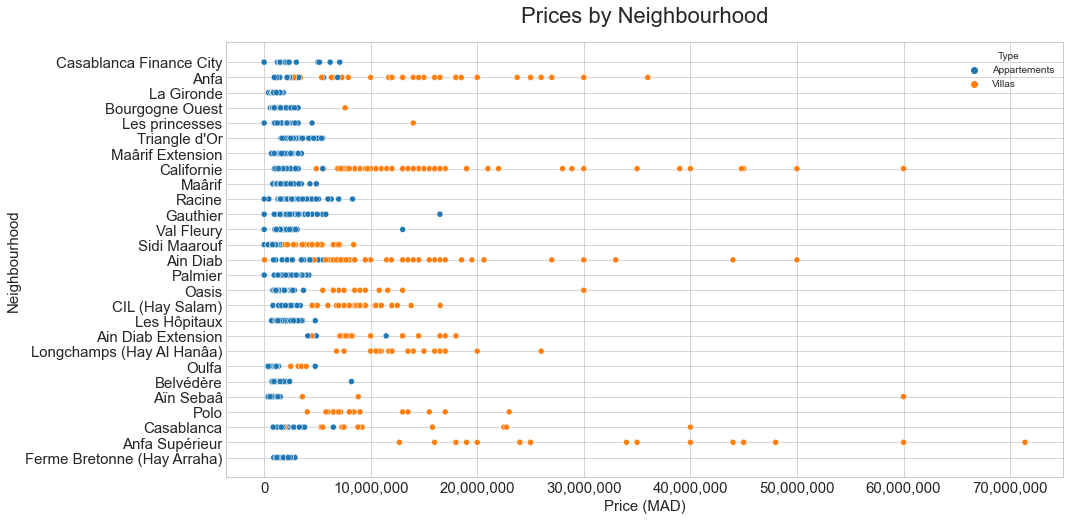

In [119]:
#Visualize the prices by neighbourhood and by type

fig,ax = plt.subplots(figsize = (15,8))
ax = sns.scatterplot(data = df_20_plus,y='Localisation',x='Price',hue = 'Type')
ax.set_ylabel('Neighbourhood',fontsize = 15)
ax.set_xlabel('Price (MAD)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))
ax.set_title('Prices by Neighbourhood',pad = 20,fontsize = 22)
plt.show()

First we will drop every listing with a price below 250 KMAD as a rational threshold based on data investigation and expertise. The reason for this is that statistical test for spotting ouliters do not have a sense of the subject matter and cannot definitively identify outliers

In [120]:
df_20_plus = df_20_plus[df_20_plus.Price > 250000].reset_index(drop = True)

#### Spotting other outliers using z-score

To  deal with the fact that the z-score is already biased due to outliers, we will apply the sorting twice.

We will spot the outliers with an absolute z score greater than 4.

This will allow us to make the difference between true outliers and real values with particularly large or small price per m2.

In [121]:
#Select indices of potential ouliers
quartiers = df_20_plus.Localisation.unique()
types = df_20_plus.Type.unique()
z_pos_thresh = 3.5

id_drop = []

#get indices with z scores computed on price larger than the threshold
for type_ in types:
    for qrt in quartiers:
        df_nei = df_20_plus[(df_20_plus.Localisation == qrt)&(df_20_plus.Type == type_)]
        outliers = df_nei[np.abs(stats.zscore(df_nei['Price'])>z_pos_thresh)]
        id_drop.append([item for item in outliers.index])

id_drop = [item for elem in id_drop for item in elem]
print( f'{len(id_drop)} outliers have been spotted')

9 outliers have been spotted


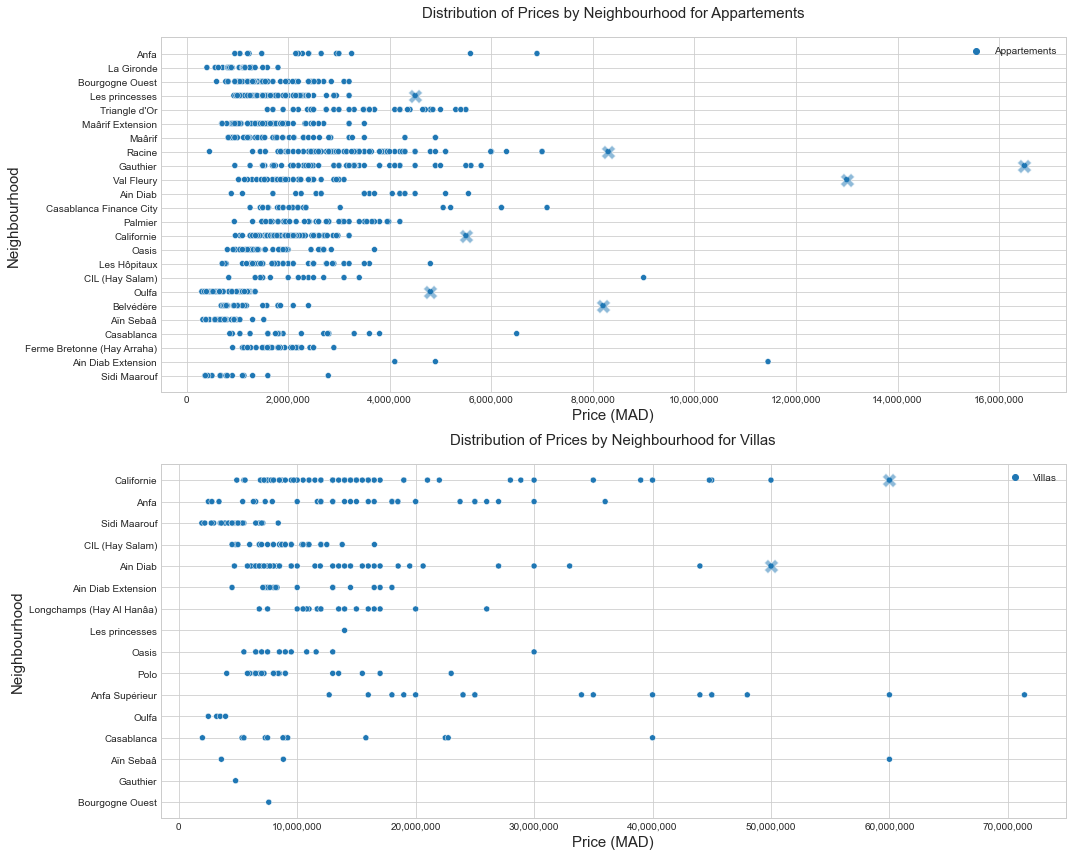

In [122]:
#Visualize the listings price_m2 by neighbourhoods and selected outliers

fig, (ax1,ax2) = plt.subplots(2,1,figsize = (15,12))
g1 = sns.scatterplot(data = df_20_plus[df_20_plus.Type == 'Appartements'],
                     y='Localisation',
                     x='Price',
                     hue = 'Type',
                     ax = ax1,
                     color = cust_pal[5])

g2 = sns.scatterplot(data = df_20_plus.loc[id_drop][df_20_plus.loc[id_drop].Type == 'Appartements'],
                     y='Localisation',
                     x='Price',
                     alpha = 0.5,
                     marker = 'X',
                     palette='brg',
                     s= 200,
                     ax =ax1)
ax1.xaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))
ax1.set_ylabel('Neighbourhood',fontdict = {'fontsize':15})
ax1.set_xlabel('Price (MAD)', fontdict = {'fontsize':15})
ax1.set_title('Distribution of Prices by Neighbourhood for Appartements',pad = 20,fontdict = {'fontsize':15})


g1 = sns.scatterplot(data = df_20_plus[df_20_plus.Type == 'Villas'],
                     y='Localisation',
                     x='Price',
                     hue = 'Type',
                     ax = ax2,
                     color = cust_pal[5])

g2 = sns.scatterplot(data = df_20_plus.loc[id_drop][df_20_plus.loc[id_drop].Type == 'Villas'],
                     y='Localisation',
                     x='Price',
                     alpha = 0.5,
                     marker = 'X',
                     palette='brg',
                     s= 200,
                     ax =ax2)
ax2.set_ylabel('Neighbourhood',fontdict = {'fontsize':15})
ax2.set_xlabel('Price (MAD)', fontdict = {'fontsize':15})
ax2.set_title('Distribution of Prices by Neighbourhood for Villas',pad = 20,fontdict = {'fontsize':15})
ax2.xaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))

plt.tight_layout()
plt.show()

In [123]:
#Drop outliers
df_outli = df_20_plus.drop(id_drop).reset_index(drop = True)

In [124]:
#Select indices of potential ouliers
quartiers = df_20_plus.Localisation.unique()
types = df_20_plus.Type.unique()
z_pos_thresh = 3.5
id_drop_2 = []

#get indices with z scores computed on price_m2 larger than the threshold
for qrt in quartiers:
    df_nei = df_outli[(df_outli.Localisation == qrt)]
    outliers = df_nei[np.abs(stats.zscore(df_nei['Price'])>z_pos_thresh)]
    id_drop_2.append([item for item in outliers.index])

id_drop_2 = [item for elem in id_drop_2 for item in elem]
print( f'{len(id_drop_2)} outliers have been spotted')

11 outliers have been spotted


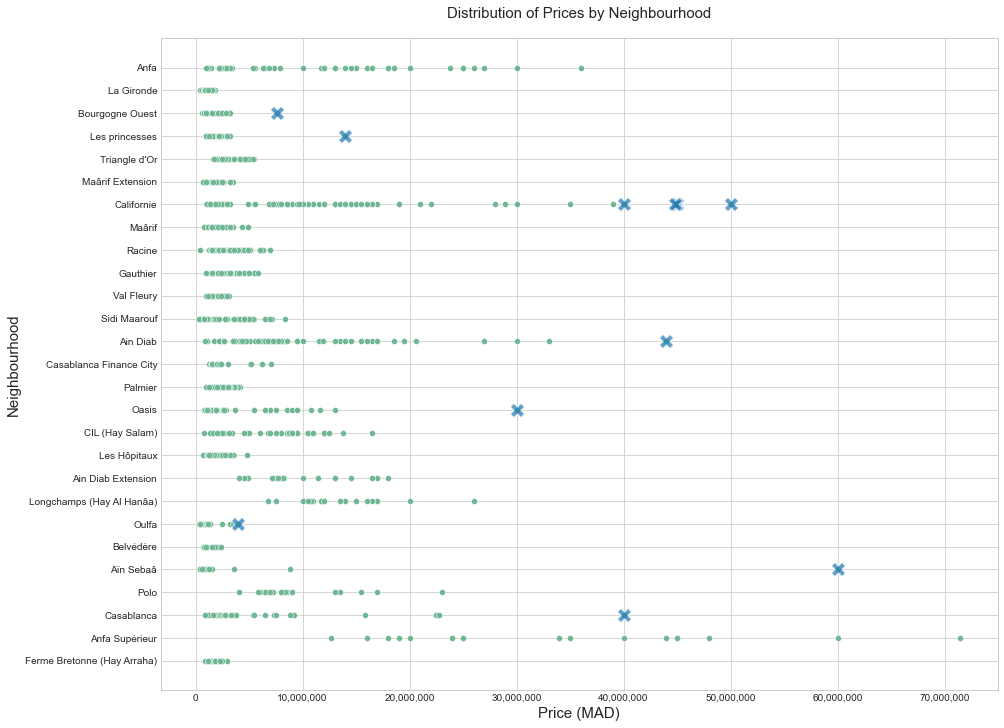

In [125]:
#Visualize the listings price_m2 by neighbourhoods and selected outliers
fig, ax = plt.subplots(figsize = (15,12))
g1 = sns.scatterplot(data = df_outli,
                     y='Localisation',
                     x='Price',
                     ax = ax,
                     color = cust_pal[5])
g2 = sns.scatterplot(data = df_outli.loc[id_drop_2],
                     y='Localisation',
                     x='Price',
                     marker = 'X',
                     alpha = 0.7,
                     palette='brg',
                     s= 200,
                     ax =ax)

_ = plt.ylabel('Neighbourhood',fontdict = {'fontsize':15})
_ = plt.xlabel('Price (MAD)', fontdict = {'fontsize':15})
_ = plt.title('Distribution of Prices by Neighbourhood',pad = 20,fontdict = {'fontsize':15})
ax.xaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))
plt.show()

In [126]:
#Drop outliers
df_clean = df_outli.drop(id_drop_2).reset_index(drop = True)

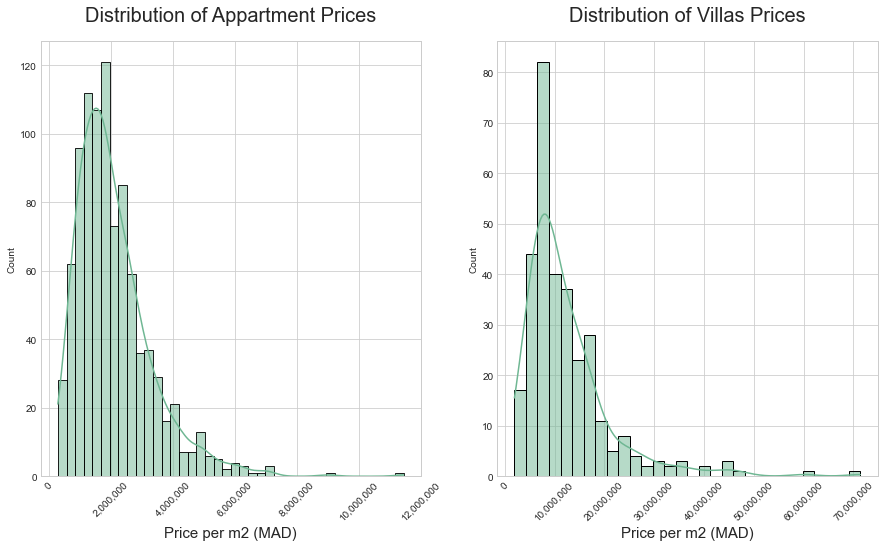

In [144]:
#Distribution of price per m2 after cleaning outliers
#Plot the distribution of price per m2
fig, ax = plt.subplots(1,2,figsize = (15,8))

g = sns.histplot(data = df_clean[df_clean.Type == 'Appartements'], x = 'Price',color = cust_pal[5], ax = ax[0],kde = True)
ax[0].set_title('Distribution of Appartment Prices',fontsize = 20, pad = 20)
ax[0].set_xlabel('Price per m2 (MAD)',fontsize = 15)
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))
ax[0].tick_params('x',rotation = 45)

g = sns.histplot(data = df_clean[df_clean.Type == 'Villas'], x = 'Price',color = cust_pal[5], ax = ax[1],kde = True)
ax[1].set_title('Distribution of Villas Prices',fontsize = 20, pad = 20)
ax[1].set_xlabel('Price per m2 (MAD)',fontsize = 15)
ax[1].xaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))
ax[1].tick_params('x',rotation = 45)
plt.show()

With outliers removed, we now have a much better idea of the overall distribution of price per m2 and its distribution within each of the 27 selected neighbourhoods although we could improv this by collecting more listings for these neighbourhoods, especially the ones on the lower end in terms of number of listings. 

#### Relationship between price and categorical variables

Average price by neighbourhood for Villas and Appartements

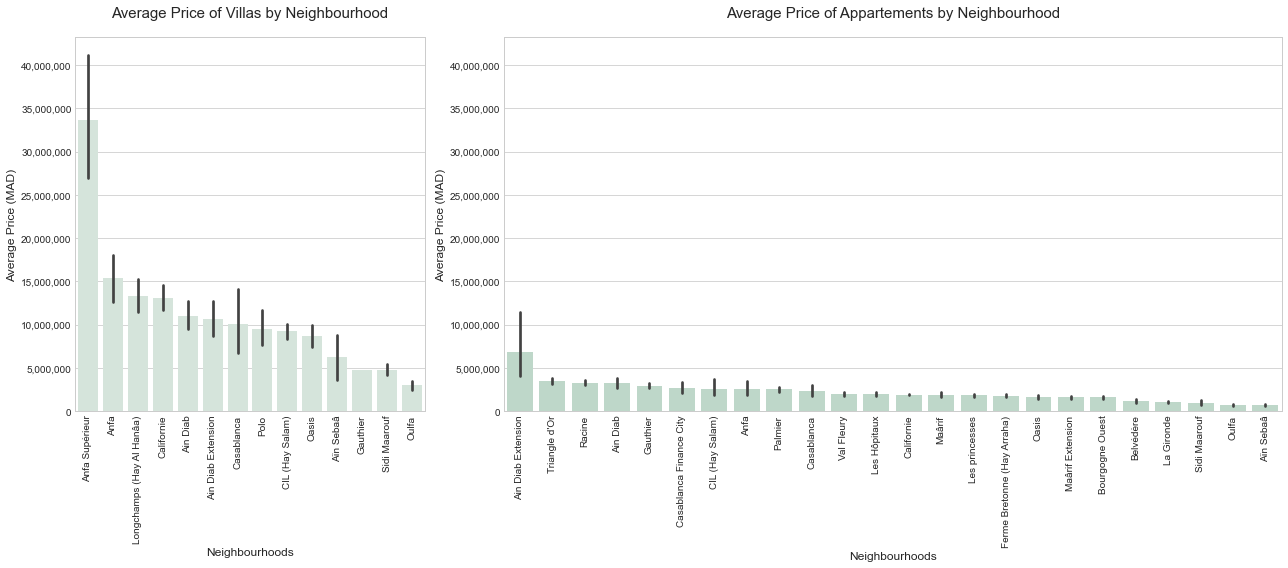

In [100]:
#Visualize the average price per m2 by neighbourhood and by type

fig, ax = plt.subplots(1,3,figsize = (18,8))
ax[0] = plt.subplot2grid((1,3),(0,0),colspan = 1)
ax[1] = plt.subplot2grid((1,3),(0,1),colspan = 2)

g = sns.barplot(x=df_clean[df_clean.Type == 'Villas'].Localisation,
                y=df_clean[df_clean.Type == 'Villas'].Price,
                palette = [cust_pal[1]],
                order = df_clean[df_clean.Type == 'Villas'].groupby('Localisation').mean()['Price'].sort_values(ascending = False).index,
                ax = ax[0])
ax[0].set_title('Average Price of Villas by Neighbourhood',fontsize = 15,pad=20)
ax[0].set_ylabel('Average Price (MAD)',fontsize = 12)
ax[0].set_xlabel('Neighbourhoods',fontsize = 12)
ax[0].yaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))
ax[0].tick_params('x',rotation = 90)


g = sns.barplot(x=df_clean[df_clean.Type == 'Appartements'].Localisation,
                y=df_clean[df_clean.Type == 'Appartements'].Price,
                palette = [cust_pal[2]],
                order = df_clean[df_clean.Type == 'Appartements'].groupby('Localisation').mean()['Price'].sort_values(ascending = False).index,
                ax = ax[1])
ax[1].sharey(ax[0])
ax[1].set_title('Average Price of Appartements by Neighbourhood',fontsize = 15,pad=20)
ax[1].set_ylabel('Average Price (MAD)',fontsize = 12)
ax[1].set_xlabel('Neighbourhoods',fontsize = 12)
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))
ax[1].tick_params('x',rotation = 90)

plt.tight_layout()
plt.show()

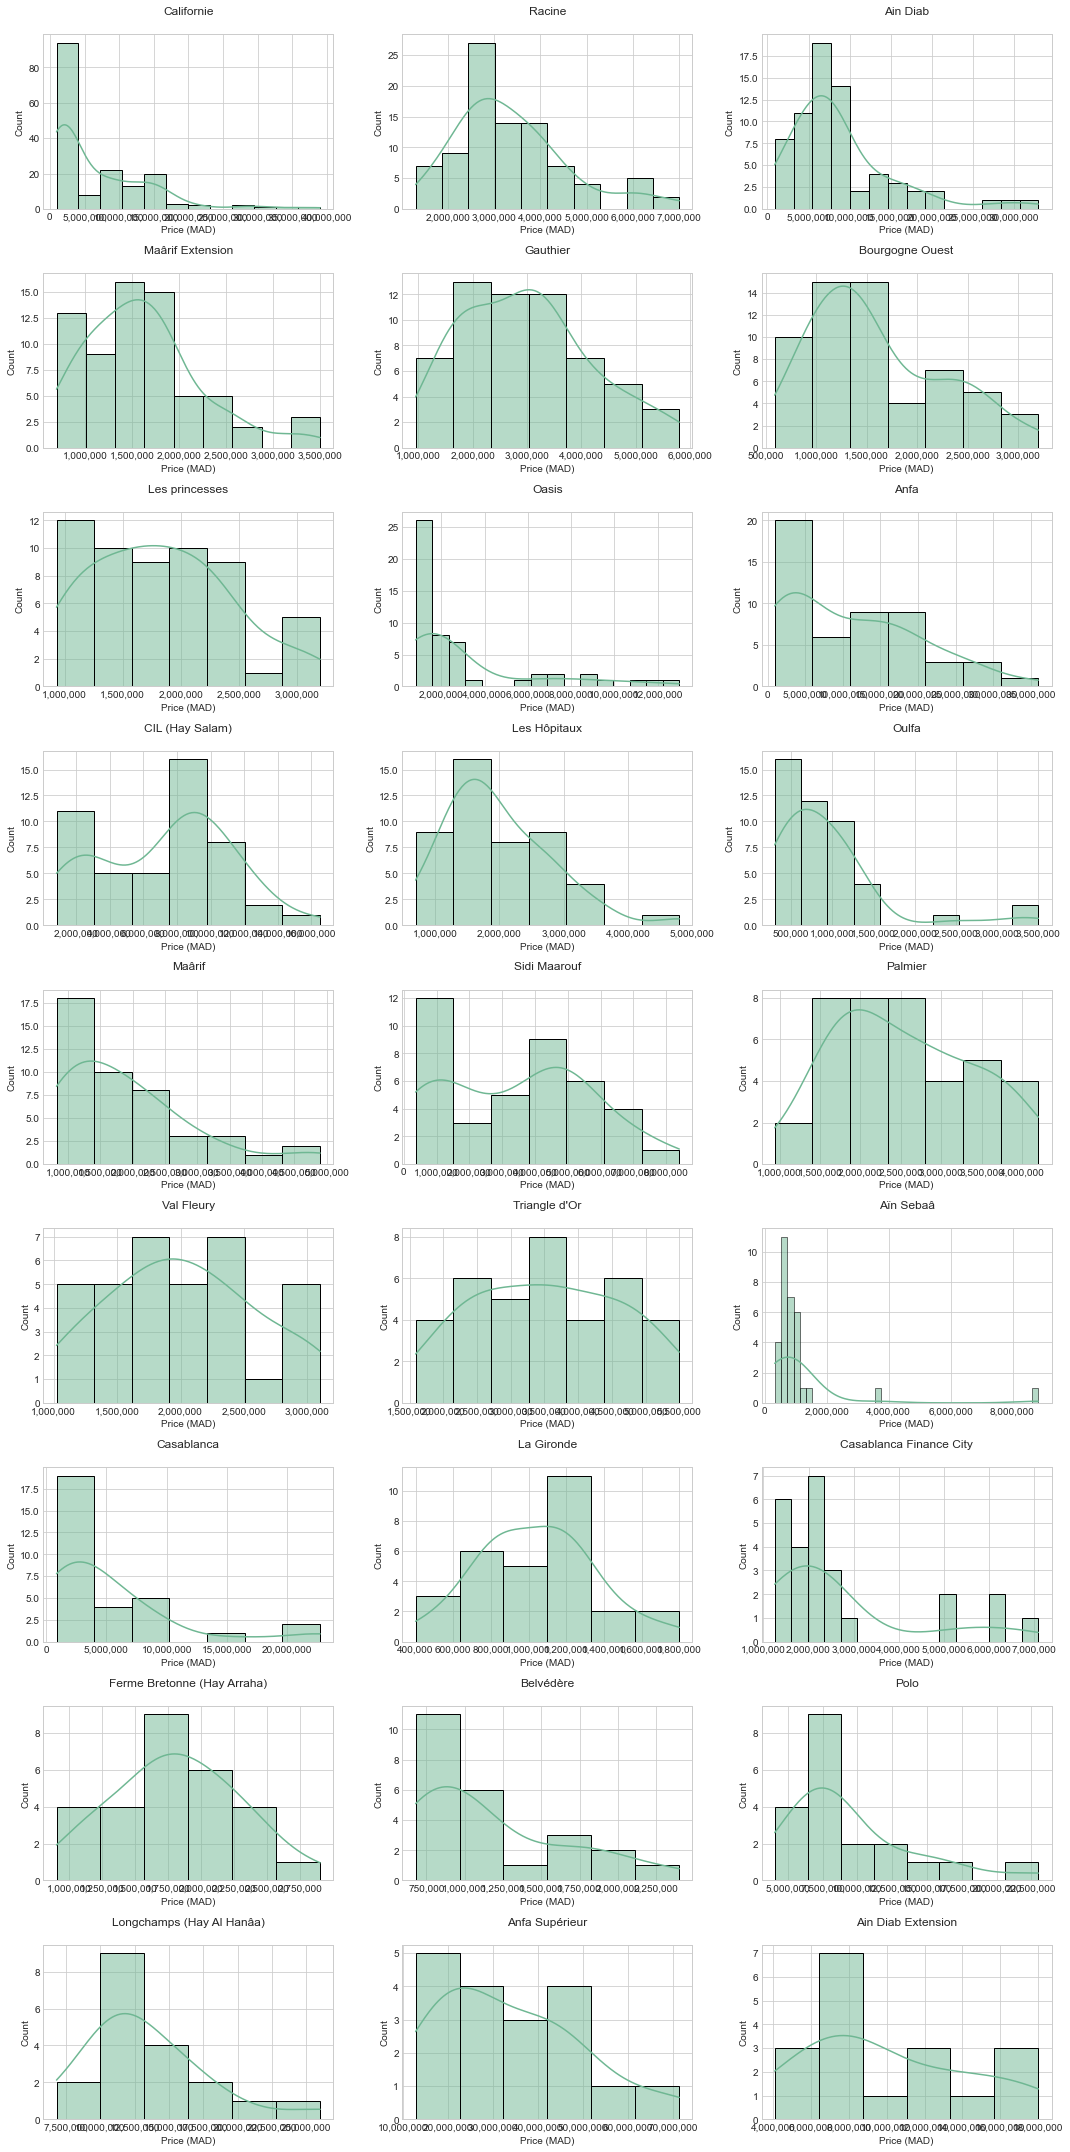

In [72]:
#Plot the distribution of price_m2 by neighbourhood
fig, axes = plt.subplots(9,3,figsize = (15,30))

n = 0
for i in range(9):
    for t in range(3):
        g = sns.histplot(data=df_clean[df_clean.Localisation == (neighbourhoods_kept[n])],
                         x = 'Price',
                         bins = 'auto',
                         kde=True,
                         ax=axes[i,t],
                         color = cust_pal[5])
        g.set_title(f'{neighbourhoods_kept[n]}',pad = 20)
        g.xaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x), ',')))
        g.set_xlabel('Price (MAD)')
        n+=1


plt.tight_layout()
plt.show()

Average price per m2 by current state for Villas and Appartements

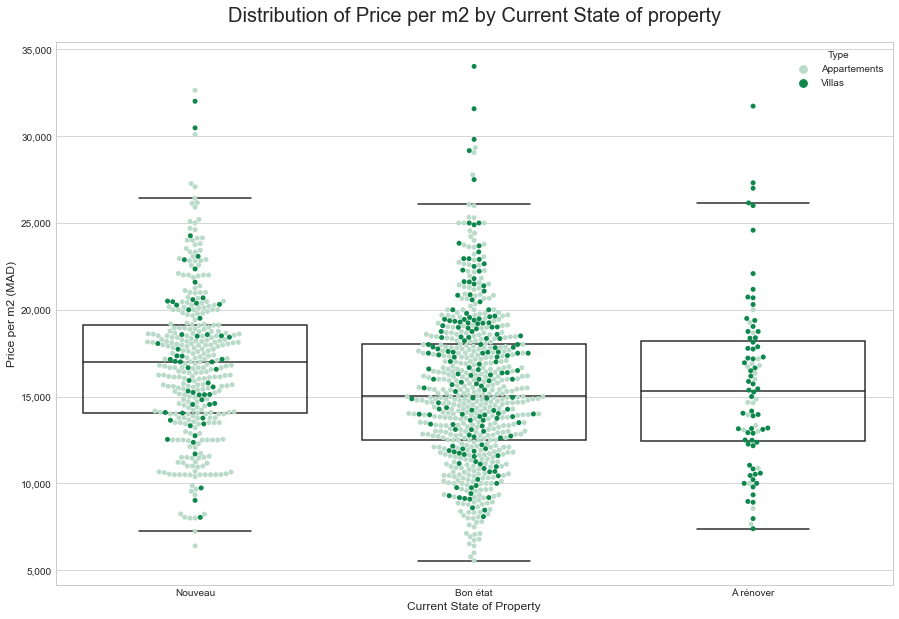

In [180]:
#Average price per m2 by tag
fig, ax = plt.subplots(figsize = (15,10))

#Plot swarm and box for average price by current state variable
g = sns.swarmplot(data= df_clean,
                x = 'Current_state',
                y = 'Price_m2',
                palette = [cust_pal[2],cust_pal[9]],
                ax = ax,
                hue = 'Type',
                order = ['Nouveau','Bon état','À rénover'])
g = sns.boxplot(data= df_clean,
                  x = 'Current_state',
                  y = 'Price_m2',
                  palette = [cust_pal[2],cust_pal[9]],
                  ax = ax,
                  order = ['Nouveau','Bon état','À rénover'],
                  showcaps=True,
                  boxprops={'facecolor':'None'},
                  showfliers=False,
                  whiskerprops={'linewidth':0})
ax.set_title('Distribution of Price per m2 by Current State of property',fontsize = 20,pad = 20)
ax.set_xlabel('Current State of Property',fontsize = 12)
ax.set_ylabel('Price per m2 (MAD)',fontsize = 12)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))

plt.show()

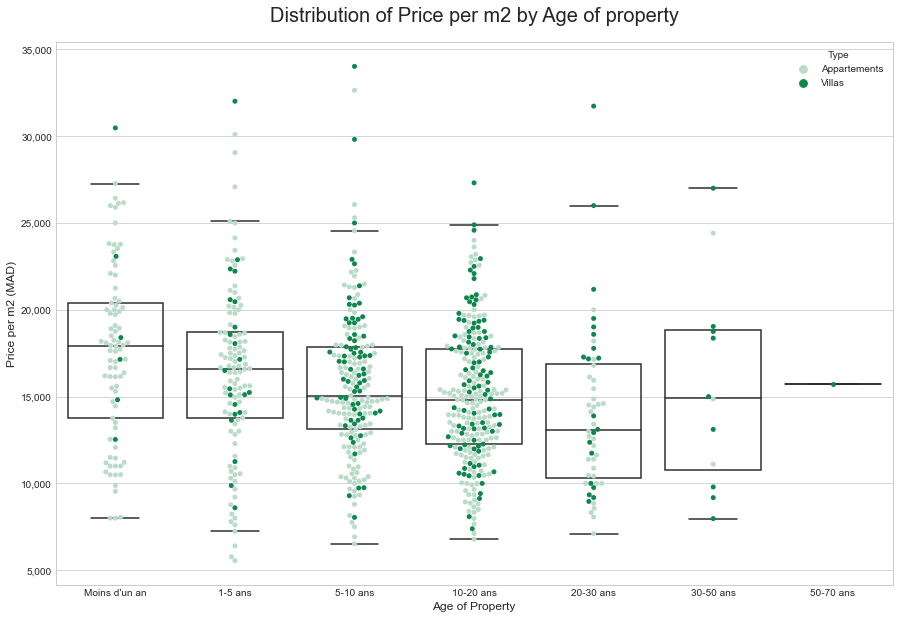

In [179]:
#Plot swarm and box for average price by Age variable

fig, ax = plt.subplots(figsize = (15,10))

g = sns.swarmplot(data= df_clean, 
                x = 'Age',
                y = 'Price_m2',
                palette = [cust_pal[2],cust_pal[9]],
                ax = ax,
                hue = 'Type',
                order = ["Moins d'un an",'1-5 ans','5-10 ans','10-20 ans','20-30 ans','30-50 ans','50-70 ans'])
g = sns.boxplot(data= df_clean,
                  x = 'Age',
                  y = 'Price_m2',
                  palette = [cust_pal[2],cust_pal[9]],
                  ax = ax,
                  order =  ["Moins d'un an",'1-5 ans','5-10 ans','10-20 ans','20-30 ans','30-50 ans','50-70 ans'],
                  showcaps=True,
                  boxprops={'facecolor':'None'},
                  showfliers=False,
                  whiskerprops={'linewidth':0})
ax.set_title('Distribution of Price per m2 by Age of property',fontsize = 20,pad = 20)
ax.set_xlabel('Age of Property',fontsize = 12)
ax.set_ylabel('Price per m2 (MAD)',fontsize = 12)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x,p: format(int(x),',')))

plt.show()

#### Explore the relationship between features

In [324]:
df_clean.columns

Index(['Type', 'Localisation', 'Latitude', 'Longitude', 'Price', 'Area',
       'Rooms', 'Bedrooms', 'Bathrooms', 'Floor', 'Price_m2', 'Nouveau',
       'Moins d'un an', 'Bon état', '10-20 ans', '5-10 ans', '20-30 ans',
       '1-5 ans', 'À rénover', '30-50 ans', '50-70 ans'],
      dtype='object')

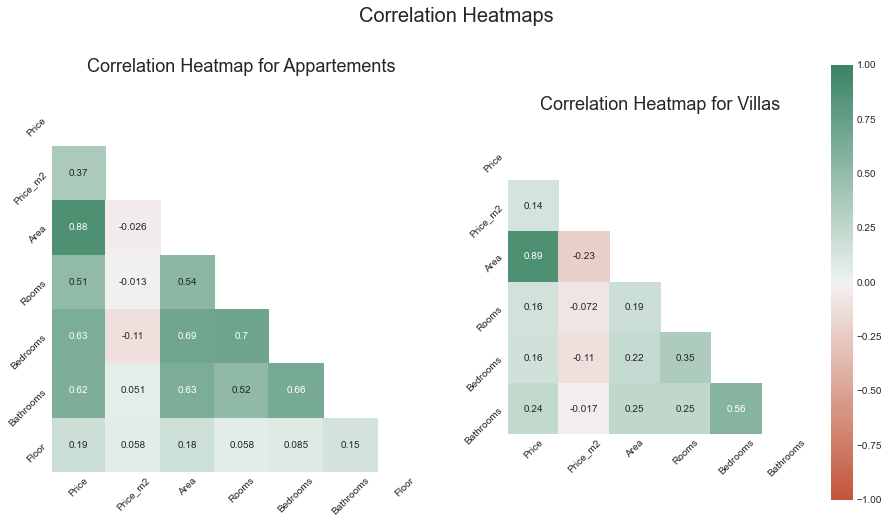

In [189]:
#Plot a correlation matrix

corr_vars_apt = ['Price','Price_m2','Area','Rooms','Bedrooms','Bathrooms','Floor']
corr_vars_vil = ['Price','Price_m2','Area','Rooms','Bedrooms','Bathrooms']

mask_apt = np.triu(np.ones_like(df_clean[corr_vars_apt].corr()))
mask_vil = np.triu(np.ones_like(df_clean[corr_vars_vil].corr()))

corr_mat_apt = df_clean[df_clean.Type == 'Appartements'][corr_vars_apt].corr()
corr_mat_vil = df_clean[df_clean.Type == 'Villas'][corr_vars_vil].corr()

fig, axes = plt.subplots(1,2,figsize = (15,8))
axes[0] = sns.heatmap(corr_mat_apt,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(15, 150, n=500),
                   square=True,annot=True,mask=mask_apt,ax = axes[0],cbar = False)
axes[0].set_title('Correlation Heatmap for Appartements',fontdict = {'fontsize':18},pad=20)
axes[0].tick_params(labelrotation=45)

axes[1] = sns.heatmap(corr_mat_vil,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 150, n=500),
                   square=True,annot=True,mask=mask_vil, ax = axes[1])
axes[1].set_title('Correlation Heatmap for Villas',fontdict = {'fontsize':18},pad=20)
axes[1].tick_params(labelrotation=45)
plt.suptitle('Correlation Heatmaps',fontsize = 20)

plt.show()

For Appartements we notice that the price per m2 seems to be uncorrelated with all the other features excpet for the number of bedrooms with which it has a small negative correlation

For Villas, pr

#### Export dataframe for model building

In [433]:
df_clean.to_csv('mubawab_listings_eda.csv',index=False)